In [1]:

import re
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from sklearn import preprocessing

In [27]:
#df = pd.read_('C:/Users/keith/Desktop/Thinkful/SMSSpamCollection.txt')
#df = pd.read_('C:/Users/keith/Desktop/Thinkful/SMSSpamCollection.txt')

pd.set_option('display.max_columns', None) # disables trucated columns 
pd.set_option('display.max_rows', None) # disables trucated rows

df.head()
 

ParserError: Error tokenizing data. C error: Expected 20 fields in line 3, saw 28


In [3]:
df = df[['Gender','Attrition','EducationField','Age','MonthlyIncome','MonthlyRate','EnvironmentSatisfaction','JobSatisfaction','RelationshipSatisfaction']]
df.head()

,Gender,Attrition,EducationField,Age,MonthlyIncome,MonthlyRate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction
0,Female,Yes,Life Sciences,41,5993,19479,2,4,1
1,Male,No,Life Sciences,49,5130,24907,3,2,4
2,Male,Yes,Other,37,2090,2396,4,3,2
3,Female,No,Life Sciences,33,2909,23159,4,3,3
4,Male,No,Medical,27,3468,16632,1,2,4


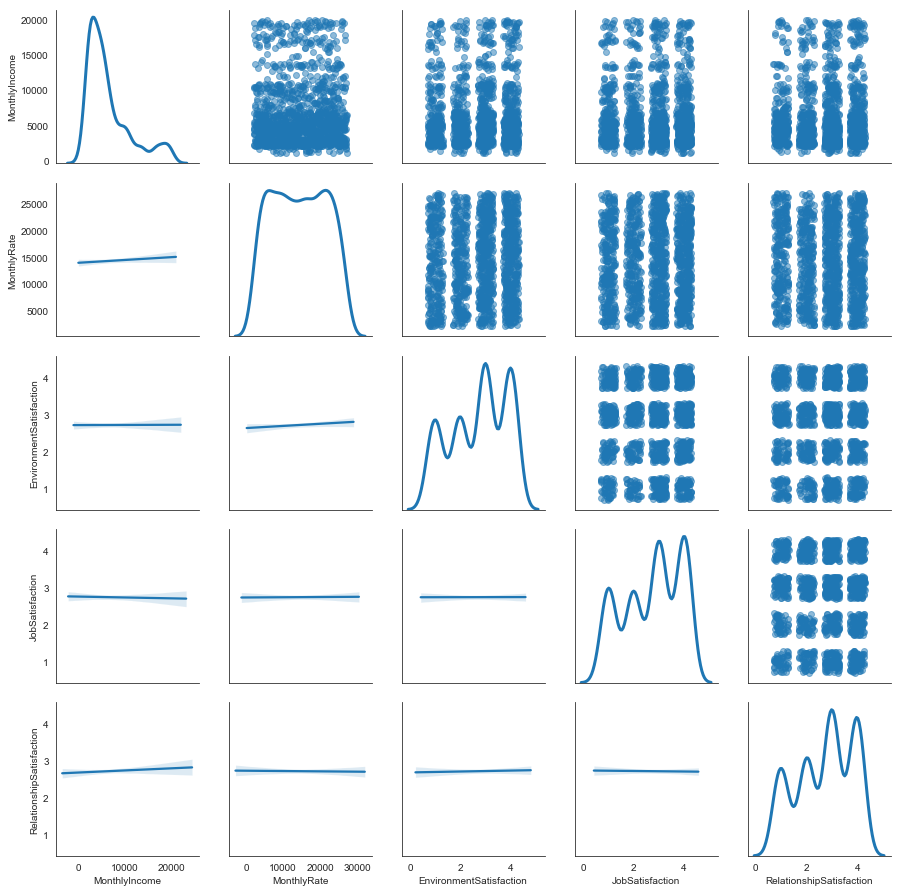

In [4]:
# Make the scatterplot matrix
sns.set_style("white")
#subset of the data  
df_attrition = df.loc[
    ((df['Attrition'] == 'Yes')|(df['Attrition'] == 'No')),
    ['Attrition','MonthlyIncome','MonthlyRate','EnvironmentSatisfaction','JobSatisfaction',
     'RelationshipSatisfaction',]
]

 
# create a dataframe of jitter and add it only when plotting.
# Make a copy of the data to add jitter to and plot.
df_jittered = df_attrition.loc[:, 'MonthlyIncome':'RelationshipSatisfaction'].dropna()
# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(df_jittered.shape)),
    columns=df_jittered.columns
)
# Combine the data and the noise.
df_jittered = df_jittered.add(jitter)
# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

#Some warnings will show up below because the plot does not include a legend.

                          MonthlyIncome  MonthlyRate  EnvironmentSatisfaction  \
MonthlyIncome                  1.000000     0.034814                -0.006259   
MonthlyRate                    0.034814     1.000000                 0.037600   
EnvironmentSatisfaction       -0.006259     0.037600                 1.000000   
JobSatisfaction               -0.007157     0.000644                -0.006784   
RelationshipSatisfaction       0.025873    -0.004085                 0.007665   

                          JobSatisfaction  RelationshipSatisfaction  
MonthlyIncome                   -0.007157                  0.025873  
MonthlyRate                      0.000644                 -0.004085  
EnvironmentSatisfaction         -0.006784                  0.007665  
JobSatisfaction                  1.000000                 -0.012454  
RelationshipSatisfaction        -0.012454                  1.000000  


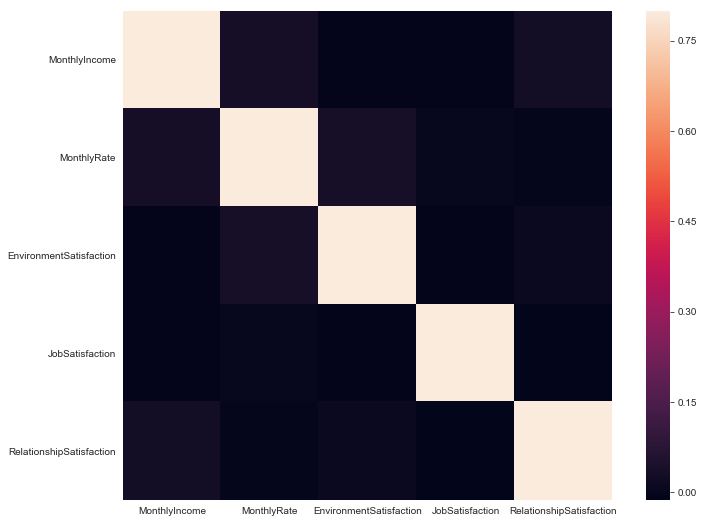

In [5]:
 # Make the correlation matrix.
corrmat = df_attrition.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()
# Heatmaps are a great way to get a quick visual read on a big correlation matrix.

# Try to match the correlation numbers to the scatterplots above to get a 
# sense of what each magnitude of correlation can look like.


c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\keith\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


          MonthlyIncome                                                    \
                  count         mean          std     min     25%     50%   
Attrition                                                                   
No               1233.0  6832.739659  4818.208001  1051.0  3211.0  5204.0   
Yes               237.0  4787.092827  3640.210367  1009.0  2373.0  3202.0   

                           MonthlyRate                                     \
              75%      max       count          mean          std     min   
Attrition                                                                   
No         8834.0  19999.0      1233.0  14265.779400  7102.260749  2094.0   
Yes        5916.0  19859.0       237.0  14559.308017  7208.153264  2326.0   

                                              
              25%      50%      75%      max  
Attrition                                     
No         7973.0  14120.0  20364.0  26997.0  
Yes        8870.0  14618.0  21081.0  269

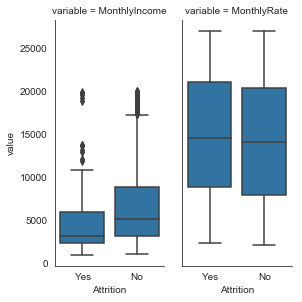

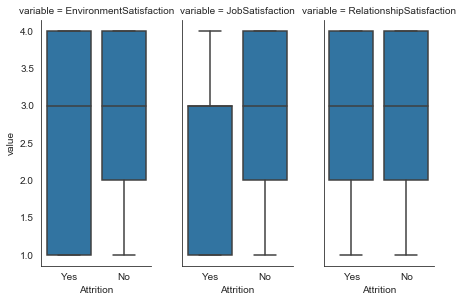

In [6]:
# Plot the variables with boxplots for attrition.
# Restructure the data so we can use FacetGrid rather than making a boxplot
# for each variable separately.
df_long = df_attrition.loc[
    ((df['Attrition'] == 'Yes')|(df['Attrition'] == 'No')),
    ['Attrition','MonthlyIncome','MonthlyRate']]
df_long = pd.melt(df_long, id_vars=['Attrition'])
g = sns.FacetGrid(df_long, col="variable", size=4.3, aspect=.5)
g = g.map(sns.boxplot, "Attrition", "value")


# Descriptive statistics by group.
print(df_attrition.loc[:,'Attrition':'MonthlyRate'].groupby('Attrition').describe())

# Test whether group differences are significant.
for col in df_attrition.loc[:,'MonthlyIncome':'MonthlyRate'].columns:
    print(col)
    print(stats.ttest_ind(
        df_attrition[df_attrition['Attrition'] == 'Yes'][col].dropna(),
        df_attrition[df_attrition['Attrition'] == 'No'][col].dropna()
         
    ))
    
print()    
    

    
# Plot the variables with boxplots for attrition.
# Restructure the data so we can use FacetGrid rather than making a boxplot
# for each variable separately.
df_long = df_attrition.loc[
    ((df['Attrition'] == 'Yes')|(df['Attrition'] == 'No')),
    ['Attrition','EnvironmentSatisfaction','JobSatisfaction','RelationshipSatisfaction']]
df_long = pd.melt(df_long, id_vars=['Attrition'])
g = sns.FacetGrid(df_long, col="variable", size=4.3, aspect=.5)
g = g.map(sns.boxplot, "Attrition", "value")


# Descriptive statistics by group.
print(df_attrition.loc[:,['Attrition','EnvironmentSatisfaction','RelationshipSatisfaction']].groupby('Attrition').describe())

# Test whether group differences are significant.
for col in df_attrition.loc[:,'EnvironmentSatisfaction':'RelationshipSatisfaction'].columns:
    print(col)
    print(stats.ttest_ind(
        df_attrition[df_attrition['Attrition'] == 'Yes'][col].dropna(),
        df_attrition[df_attrition['Attrition'] == 'No'][col].dropna()
         
    ))

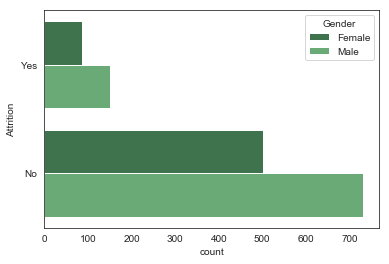

Gender     Female  Male
Attrition              
No            501   732
Yes            87   150
Power_divergenceResult(statistic=752.8408163265306, pvalue=7.304007796791317e-163)


In [7]:
# Add a second categorical variable.
df_2cat = df.loc[
    ((df['Attrition'] == 'Yes') | (df['Attrition'] == 'No')),
    ['Attrition','Gender']
]

# Plot counts for each combination of levels.
sns.countplot(y="Attrition", hue="Gender", data=df_2cat, palette="Greens_d")
plt.show()

# Table of counts
counttable = pd.crosstab(df_2cat['Attrition'], df_2cat['Gender'])
print(counttable)

#chi-square test  
print(stats.chisquare(counttable, axis=None))

In [8]:
means = df[['EnvironmentSatisfaction','JobSatisfaction','RelationshipSatisfaction']].mean(axis=0)
stds = df[['EnvironmentSatisfaction','JobSatisfaction','RelationshipSatisfaction']].std(axis=0)

df['Satisfaction'] = ((df_attrition[['EnvironmentSatisfaction','JobSatisfaction',
                                              'RelationshipSatisfaction']] - means) / stds).mean(axis=1)


In [9]:
df['under_35'] = np.where(df['Age']<=35, 1, 0)
# Check
print(df['Age'].groupby(df['under_35']).describe())

          count       mean       std   min   25%   50%   75%   max
under_35                                                          
0         741.0  44.187584  6.460789  36.0  39.0  43.0  49.0  60.0
1         729.0  29.540466  4.204435  18.0  27.0  30.0  33.0  35.0


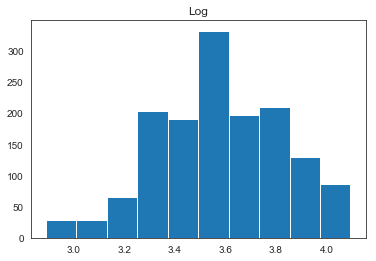

In [10]:
plt.hist(np.log(df['Age'].dropna()))
plt.title('Log')
plt.show() 

In [11]:
df['log_age'] = np.log(df['Age'])

In [12]:
df['age_squared'] = df['Age'] * df['Age']

In [13]:
df['Gender_bin'] = np.where(df.Gender =='Male',1,0)

In [14]:
print(df.Attrition.unique())

['Yes' 'No']


In [15]:
features = df[['Satisfaction','under_35','log_age','age_squared','Gender_bin']]

In [17]:
 features.head()

,Satisfaction,under_35,log_age,age_squared,Gender_bin
0,-0.363695,0,3.713572,1681,0
1,0.261648,0,3.891820,2401,1
2,0.252250,0,3.610918,1369,1
3,0.560547,1,3.496508,1089,0
4,-0.348249,1,3.295837,729,1
